# Création du Réseau de neurones

## Importer les données

In [1]:
import glob

In [2]:
# Récupération liste des fichiers femme


list_fichiers_jeune_f = glob.glob("/media/lise/SMARTDISK/BrissetLise_M2TAL_age/xvectors_4sec/femme/jeune/*/*.pt")
list_fichiers_mid_f = glob.glob("/media/lise/SMARTDISK/BrissetLise_M2TAL_age/xvectors_4sec/femme/mid/*/*.pt")
list_fichiers_vieux_f = glob.glob("/media/lise/SMARTDISK/BrissetLise_M2TAL_age/xvectors_4sec/femme/vieux/*/*.pt")
list_fichiers_fichiers_total_f = list_fichiers_jeune_f + list_fichiers_mid_f + list_fichiers_vieux_f

print(len(list_fichiers_jeune_f))
print(len(list_fichiers_mid_f))
print(len(list_fichiers_vieux_f))
print(len(list_fichiers_fichiers_total_f))

list_locuteur_jeune_f = [x.split('/')[-2] for x in list_fichiers_jeune_f]
list_locuteur_mid_f = [x.split('/')[-2] for x in list_fichiers_mid_f]
list_locuteur_vieux_f = [x.split('/')[-2] for x in list_fichiers_vieux_f]

print(len(set(list_locuteur_jeune_f)))
print(len(set(list_locuteur_mid_f)))
print(len(set(list_locuteur_vieux_f)))



4828
12949
7662
25439
10
28
15


In [3]:
print(f"Locuteurs jeunes: {set(list_locuteur_jeune_f)}")
print(f"Locuteurs mid: {set(list_locuteur_mid_f)}")
print(f"Locuteurs vieux: {set(list_locuteur_vieux_f)}")

Locuteurs jeunes: {'ESLO2_ENTJEUN_1231', 'ESLO2_ENTJEUN_1230', 'ESLO2_ENT_1007', 'ESLO2_ENTJEUN_1234', 'ESLO2_ENT_1038', 'ESLO2_ENTJEUN_1235', 'ESLO2_ENTJEUN_1229', 'ESLO2_ENT_1003', 'ESLO2_ENTJEUN_1236', 'ESLO2_ENT_1026'}
Locuteurs mid: {'ESLO2_ENT_1031', 'ESLO2_ENT_1002', 'ESLO2_ENT_1062', 'ESLO2_ENT_1033', 'ESLO2_ENT_1008', 'ESLO2_ENT_1067', 'ESLO2_ENT_1043', 'ESLO2_ENT_1060', 'ESLO2_ENT_1051', 'ESLO2_ENT_1005', 'ESLO2_ENT_1085', 'ESLO2_ENT_1018', 'ESLO2_ENT_1083', 'ESLO2_ENT_1056', 'ESLO2_ENT_1034', 'ESLO2_ENT_1077', 'ESLO2_ENT_1071', 'ESLO2_ENT_1044', 'ESLO2_ENT_1057', 'ESLO2_ENT_1036', 'ESLO2_ENT_1042', 'ESLO2_ENT_1045', 'ESLO2_ENT_1020', 'ESLO2_ENT_1022', 'ESLO2_ENT_1070', 'ESLO2_ENT_1016', 'ESLO2_ENT_1076', 'ESLO2_ENT_1058'}
Locuteurs vieux: {'ESLO2_ENT_1024', 'ESLO2_ENT_1039', 'ESLO2_ENT_1069', 'ESLO2_ENT_1015', 'ESLO2_ENT_1052', 'ESLO2_DIA_1222', 'ESLO2_ENT_1078', 'ESLO2_ENT_1004', 'ESLO2_ENT_1009', 'ESLO2_ENT_1023', 'ESLO2_DIA_1224', 'ESLO2_ENT_1035', 'ESLO2_ENT_1030', 'ESLO

In [4]:
# on récupère les ids des locutrices prises en val et test :
test_val_jeune = ['ESLO2_ENTJEUN_1236', 'ESLO2_ENTJEUN_1235', 'ESLO2_ENTJEUN_1229']
test_val_mid = ['ESLO2_ENT_1043', 'ESLO2_ENT_1002', 'ESLO2_ENT_1018', 'ESLO2_ENT_1057', 'ESLO2_ENT_1083', 'ESLO2_ENT_1031', 'ESLO2_ENT_1056', 'ESLO2_ENT_1060']
test_val_vieux = ['ESLO2_DIA_1222', 'ESLO2_ENT_1015', 'ESLO2_ENT_1035', 'ESLO2_ENT_1069', 'ESLO2_ENT_1023']

print(f"Locuteurs jeunes: {test_val_jeune}")
print(f"Locuteurs mid: {test_val_mid}")
print(f"Locuteurs vieux: {test_val_vieux}")

# On récupère les chemins des fichiers val et test :
nbr_total_test_val_jeune = 0
for loc in test_val_jeune:
    nbr_fichiers_jeune = len([x for x in list_locuteur_jeune_f if loc in x])
    nbr_total_test_val_jeune += nbr_fichiers_jeune

print(f"Nombre de fichiers jeunes dans le test set: {nbr_total_test_val_jeune}")

nbr_total_test_val_vieux = 0
for loc in test_val_vieux:
    nbr_fichiers_vieux = len([x for x in list_locuteur_vieux_f if loc in x])
    nbr_total_test_val_vieux += nbr_fichiers_vieux

print(f"Nombre de fichiers vieux dans le test set: {nbr_total_test_val_vieux}")

nbr_total_test_val_mid = 0
for loc in test_val_mid:
    nbr_fichiers_mid = len([x for x in list_locuteur_mid_f if loc in x])
    nbr_total_test_val_mid += nbr_fichiers_mid

print(f"Nombre de fichiers mid dans le test set: {nbr_total_test_val_mid}")

total_nbr_test_val = nbr_total_test_val_jeune + nbr_total_test_val_vieux + nbr_total_test_val_mid
nbr_total_fichiers = len(list_fichiers_jeune_f) + len(list_fichiers_mid_f) + len(list_fichiers_vieux_f)

print(f"Nombre total de fichiers dans le test set: {total_nbr_test_val}")
print(f"Nombre total de fichiers: {nbr_total_fichiers}")

print(f"Pourcentage de fichiers dans le test set: {total_nbr_test_val/nbr_total_fichiers*100:.2f}%")

Locuteurs jeunes: ['ESLO2_ENTJEUN_1236', 'ESLO2_ENTJEUN_1235', 'ESLO2_ENTJEUN_1229']
Locuteurs mid: ['ESLO2_ENT_1043', 'ESLO2_ENT_1002', 'ESLO2_ENT_1018', 'ESLO2_ENT_1057', 'ESLO2_ENT_1083', 'ESLO2_ENT_1031', 'ESLO2_ENT_1056', 'ESLO2_ENT_1060']
Locuteurs vieux: ['ESLO2_DIA_1222', 'ESLO2_ENT_1015', 'ESLO2_ENT_1035', 'ESLO2_ENT_1069', 'ESLO2_ENT_1023']
Nombre de fichiers jeunes dans le test set: 1341
Nombre de fichiers vieux dans le test set: 2425
Nombre de fichiers mid dans le test set: 4039
Nombre total de fichiers dans le test set: 7805
Nombre total de fichiers: 25439
Pourcentage de fichiers dans le test set: 30.68%


penser à la loss et précision au fil des époques

In [6]:
list_fichier_test_eval = []

for loc in test_val_jeune:
  list_files = [x for x in list_fichiers_jeune_f if loc in x]
  list_fichier_test_eval += list_files

for loc in test_val_mid:
  list_files = [x for x in list_fichiers_mid_f if loc in x]
  list_fichier_test_eval += list_files

for loc in test_val_vieux:
    list_files = [x for x in list_fichiers_vieux_f if loc in x]
    list_fichier_test_eval += list_files

print(len(list_fichier_test_eval))
print(list_fichier_test_eval)

7805
['/media/lise/SMARTDISK/BrissetLise_M2TAL_age/xvectors_4sec/femme/jeune/ESLO2_ENTJEUN_1236/ESLO2_ENTJEUN_1236_0_16000Hz.pt', '/media/lise/SMARTDISK/BrissetLise_M2TAL_age/xvectors_4sec/femme/jeune/ESLO2_ENTJEUN_1236/ESLO2_ENTJEUN_1236_1_16000Hz.pt', '/media/lise/SMARTDISK/BrissetLise_M2TAL_age/xvectors_4sec/femme/jeune/ESLO2_ENTJEUN_1236/ESLO2_ENTJEUN_1236_2_16000Hz.pt', '/media/lise/SMARTDISK/BrissetLise_M2TAL_age/xvectors_4sec/femme/jeune/ESLO2_ENTJEUN_1236/ESLO2_ENTJEUN_1236_3_16000Hz.pt', '/media/lise/SMARTDISK/BrissetLise_M2TAL_age/xvectors_4sec/femme/jeune/ESLO2_ENTJEUN_1236/ESLO2_ENTJEUN_1236_4_16000Hz.pt', '/media/lise/SMARTDISK/BrissetLise_M2TAL_age/xvectors_4sec/femme/jeune/ESLO2_ENTJEUN_1236/ESLO2_ENTJEUN_1236_5_16000Hz.pt', '/media/lise/SMARTDISK/BrissetLise_M2TAL_age/xvectors_4sec/femme/jeune/ESLO2_ENTJEUN_1236/ESLO2_ENTJEUN_1236_6_16000Hz.pt', '/media/lise/SMARTDISK/BrissetLise_M2TAL_age/xvectors_4sec/femme/jeune/ESLO2_ENTJEUN_1236/ESLO2_ENTJEUN_1236_7_16000Hz.pt', '/

In [8]:
# Shuffle de list_fichier_test
# Attribué 33% à list_fichier_eval

import random
random.shuffle(list_fichier_test_eval)

list_fichier_eval = list_fichier_test_eval[:int(len(list_fichier_test_eval)*0.33)] # 33% des données
list_fichier_test = list_fichier_test_eval[int(len(list_fichier_test_eval)*0.33):] # 67% des données

print("test :",len(list_fichier_test))
print("eval :", len(list_fichier_eval))

test : 5230
eval : 2575


In [10]:
list_fichier_test[:5]

['/media/lise/SMARTDISK/BrissetLise_M2TAL_age/xvectors_4sec/femme/mid/ESLO2_ENT_1043/ESLO2_ENT_1043_29_16000Hz.pt',
 '/media/lise/SMARTDISK/BrissetLise_M2TAL_age/xvectors_4sec/femme/mid/ESLO2_ENT_1002/ESLO2_ENT_1002_238_16000Hz.pt',
 '/media/lise/SMARTDISK/BrissetLise_M2TAL_age/xvectors_4sec/femme/jeune/ESLO2_ENTJEUN_1236/ESLO2_ENTJEUN_1236_403_16000Hz.pt',
 '/media/lise/SMARTDISK/BrissetLise_M2TAL_age/xvectors_4sec/femme/mid/ESLO2_ENT_1057/ESLO2_ENT_1057_438_16000Hz.pt',
 '/media/lise/SMARTDISK/BrissetLise_M2TAL_age/xvectors_4sec/femme/jeune/ESLO2_ENTJEUN_1236/ESLO2_ENTJEUN_1236_456_16000Hz.pt']

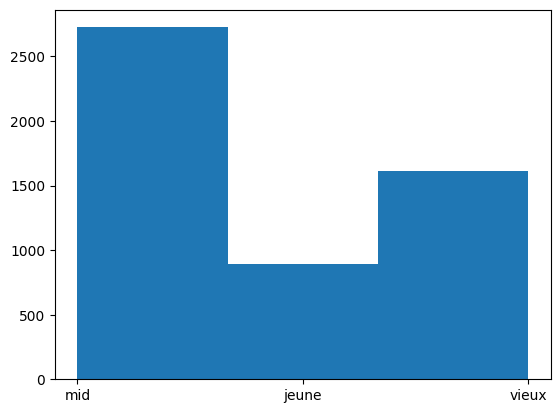

In [12]:
## Enregistre fichiers test et eval pour voir si le shuffle a fait du mauvais boulot
import matplotlib.pyplot as plt
dico_label = {'jeune': 1, 'mid': 2, 'vieux': 3}


cat = []
for fichier in list_fichier_test:
  cat.append(fichier.split('/')[-3])

plt.hist(cat, bins=3)
plt.show()

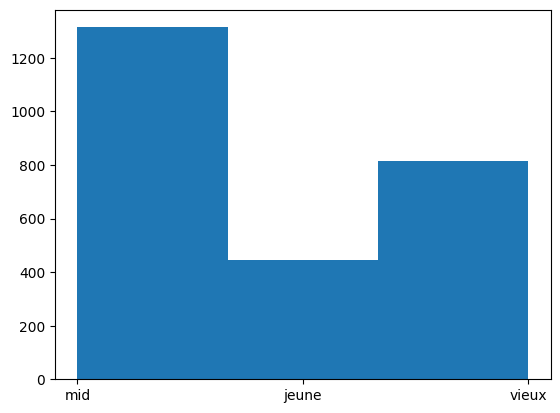

In [13]:
# pour les fichiers eval :
cat = []
for fichier in list_fichier_eval:
  cat.append(fichier.split('/')[-3])

plt.hist(cat, bins=3)
plt.show()

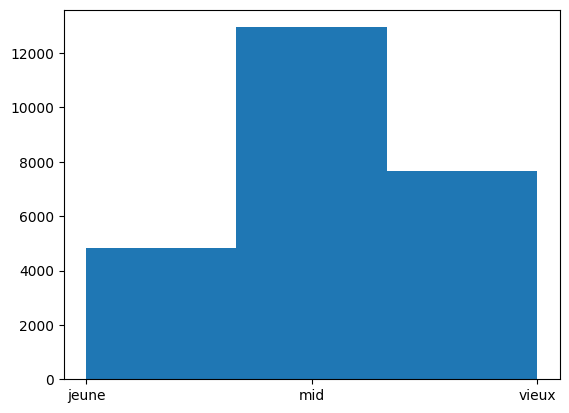

In [15]:
# pour les fichiers total : 
cat = []
for fichier in list_fichiers_fichiers_total_f:
  cat.append(fichier.split('/')[-3])

plt.hist(cat, bins=3)
plt.show()

In [16]:
# Récupérer les fichiers train

list_fichier_train = []

for fichier in list_fichiers_fichiers_total_f:
    if fichier not in list_fichier_test_eval:
        list_fichier_train.append(fichier)

print(len(list_fichier_train))

17634


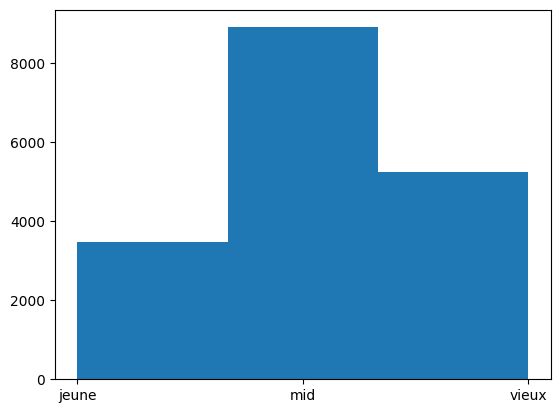

In [17]:
# pour les fichiers train :
cat = []
for fichier in list_fichier_train:
  cat.append(fichier.split('/')[-3])

plt.hist(cat, bins=3)
plt.show()

In [18]:
list_fichier_train[:5]

['/media/lise/SMARTDISK/BrissetLise_M2TAL_age/xvectors_4sec/femme/jeune/ESLO2_ENT_1003/ESLO2_ENT_1003_0_16000Hz.pt',
 '/media/lise/SMARTDISK/BrissetLise_M2TAL_age/xvectors_4sec/femme/jeune/ESLO2_ENT_1003/ESLO2_ENT_1003_1_16000Hz.pt',
 '/media/lise/SMARTDISK/BrissetLise_M2TAL_age/xvectors_4sec/femme/jeune/ESLO2_ENT_1003/ESLO2_ENT_1003_2_16000Hz.pt',
 '/media/lise/SMARTDISK/BrissetLise_M2TAL_age/xvectors_4sec/femme/jeune/ESLO2_ENT_1003/ESLO2_ENT_1003_3_16000Hz.pt',
 '/media/lise/SMARTDISK/BrissetLise_M2TAL_age/xvectors_4sec/femme/jeune/ESLO2_ENT_1003/ESLO2_ENT_1003_4_16000Hz.pt']

In [ ]:
################################## POUR UN TEST ######################################
random.shuffle(list_fichier_train)
list_fichier_train = list_fichier_train[:100]
list_fichier_test = list_fichier_test[:20]
list_fichier_eval = list_fichier_eval[:10]

print(list_fichier_train[:5])
print(list_fichier_test[:5])
print(list_fichier_eval[:5])

['/content/drive/MyDrive/Master TAL 2024-2025/M2/CNN/data_age/femme/vieux/ESLO2_ENT_1021/ESLO2_ENT_1021_428_16000Hz.pt', '/content/drive/MyDrive/Master TAL 2024-2025/M2/CNN/data_age/femme/vieux/ESLO2_ENT_1039/ESLO2_ENT_1039_356_16000Hz.pt', '/content/drive/MyDrive/Master TAL 2024-2025/M2/CNN/data_age/femme/mid/ESLO2_ENT_1076/ESLO2_ENT_1076_101_16000Hz.pt', '/content/drive/MyDrive/Master TAL 2024-2025/M2/CNN/data_age/femme/jeune/ESLO2_ENT_1003/ESLO2_ENT_1003_33_16000Hz.pt', '/content/drive/MyDrive/Master TAL 2024-2025/M2/CNN/data_age/femme/jeune/ESLO2_ENT_1026/ESLO2_ENT_1026_501_16000Hz.pt']
['/content/drive/MyDrive/Master TAL 2024-2025/M2/CNN/data_age/femme/mid/ESLO2_ENT_1031/ESLO2_ENT_1031_314_16000Hz.pt', '/content/drive/MyDrive/Master TAL 2024-2025/M2/CNN/data_age/femme/jeune/ESLO2_ENTJEUN_1235/ESLO2_ENTJEUN_1235_473_16000Hz.pt', '/content/drive/MyDrive/Master TAL 2024-2025/M2/CNN/data_age/femme/mid/ESLO2_ENT_1057/ESLO2_ENT_1057_27_16000Hz.pt', '/content/drive/MyDrive/Master TAL 202

## DIVISION TRAIN / TEST / EVAL


In [21]:
import torch

# Annotation de la catégorie
dico_label = {'jeune': 0, 'mid': 1, 'vieux': 2}

# Initialisation des listes
x_test, y_test = [], []
x_val, y_val = [], []
x_train, y_train = [], []

In [22]:
from tqdm import tqdm

# Chargement des fichiers de test avec une barre de progression
for fichier in tqdm(list_fichier_test, desc="Chargement des fichiers de test"):
    x_test.append(torch.load(fichier))
    y_test.append(dico_label[fichier.split('/')[-3]])

# Chargement des fichiers d'évaluation avec une barre de progression
for fichier in tqdm(list_fichier_eval, desc="Chargement des fichiers d'évaluation"):
    x_val.append(torch.load(fichier))
    y_val.append(dico_label[fichier.split('/')[-3]])

# Chargement des fichiers d'entraînement avec une barre de progression
for fichier in tqdm(list_fichier_train, desc="Chargement des fichiers d'entraînement"):
    x_train.append(torch.load(fichier))
    y_train.append(dico_label[fichier.split('/')[-3]])


Chargement des fichiers de test:   0%|          | 0/5230 [00:00<?, ?it/s]/tmp/ipykernel_6464/2703136689.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  x_test.append(tor

In [23]:
import numpy as np

# Convertir les listes en numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

x_val = np.array(x_val)
y_val = np.array(y_val)

x_test = np.array(x_test)
y_test = np.array(y_test)

# Entrainement du modèle

on veut la structure suivante :
- couche dense : ReLu, L2 Régularization
- Dropout 0.2
- Dense : ReLu 64, L2 Régularization
- Dense : ReLu 32, L2 Régularization
- Dense : SoftMax 3
==> Output

In [ ]:
# Librairies pour l'entrainement du modèle

In [28]:
from __future__ import print_function
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy, sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.optimizers import Adam
import torchaudio
import librosa
import torch
# from transformers import Wav2Vec2ForCTC, Wav2Vec2Tokenizer
import cv2
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.regularizers import l2

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [29]:
# hyperparamètres

batch_size = 128
num_classes = 3
epochs = 50
input_shape = x_train.shape

In [31]:
print("train")
print(x_train.shape)
print(y_train.shape)
print("val")
print(x_val.shape)
print(y_val.shape)
print("test")
print(x_test.shape)
print(y_test.shape)

train
(17634, 1, 1, 512)
(17634,)
val
(2575, 1, 1, 512)
(2575,)
test
(5230, 1, 1, 512)
(5230,)


In [34]:
print(y_train)

[0 0 0 ... 2 2 2]


In [35]:
feature_vector_lenght = 512
x_train = x_train.reshape(x_train.shape[0], feature_vector_lenght)
x_test = x_test.reshape(x_test.shape[0], feature_vector_lenght)
x_val = x_val.reshape(x_val.shape[0], feature_vector_lenght)

y_train_1_hot = to_categorical(y_train, num_classes=3)
y_test_1_hot = to_categorical(y_test, num_classes=3)
y_val_1_hot = to_categorical(y_val, num_classes=3)

print(f"x_train : {x_train.shape}")
print(f"x_test : {x_test.shape}")
print(f"x_val : {x_val.shape}")
print(f"y_train_1_hot : {y_train_1_hot.shape}")
print(f"y_test_1_hot : {y_test_1_hot.shape}")
print(f"y_val_1_hot : {y_val_1_hot.shape}")

#test_size = y_test.shape[0]

x_train : (17634, 512)
x_test : (5230, 512)
x_val : (2575, 512)
y_train_1_hot : (17634, 3)
y_test_1_hot : (5230, 3)
y_val_1_hot : (2575, 3)


In [36]:
from keras.utils import to_categorical

# Convertir y_train en one-hot encoding
num_classes = 4  # Assurez-vous que cela correspond au nombre de classes (1, 2, 3, 4)
y_train_one_hot = to_categorical(y_train, num_classes=num_classes)


In [37]:
def orane(x_train, y_train, x_test, y_test, x_val, y_val, batch_size=128, epochs=115, verbose =1):
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
    mc = ModelCheckpoint('best_model.keras', monitor='val_loss', verbose=1, save_best_only=True)

    model = Sequential()

    model.add(Dense(128, activation='relu', input_shape=(x_train.shape[1],), kernel_regularizer = l2(0.01)))
    #model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu', kernel_regularizer = l2(0.01)))
    # model.add(Flatten())
    # model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu', kernel_regularizer = l2(0.01)))
    model.add(Dense(3, activation='softmax'))


    # Optimizers on choisit Adam
    opt = Adam(learning_rate=0.001)

    model.compile(loss=categorical_crossentropy,
                  optimizer=opt, # ADA AUTRE CHOSE ADAM et sgd
                  metrics=['accuracy'])

    summary = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=verbose,
              validation_data=(x_val, y_val),
              callbacks = [es, mc])

    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])



    return summary, model, score

# Fonction basé sur le schéma du mémoire d'Orane

In [38]:
summary_orane, model_orane, score_orane = orane(x_train, y_train_1_hot, x_test, y_test_1_hot, x_val, y_val_1_hot, batch_size=batch_size, epochs=epochs, verbose =1)

Epoch 1/50


/home/lise/Documents/TAL_M2S3/CNN/venv_CNN/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-01-16 21:51:13.984547: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


126/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5815 - loss: 4.4052
Epoch 1: val_loss improved from inf to 3.05753, saving model to best_model.keras
138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5939 - loss: 4.2923 - val_accuracy: 0.5522 - val_loss: 3.0575
Epoch 2/50
133/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8929 - loss: 1.9852
Epoch 2: val_loss improved from 3.05753 to 2.98768, saving model to best_model.keras
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8934 - loss: 1.9790 - val_accuracy: 0.5317 - val_loss: 2.9877
Epoch 3/50
129/138 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9369 - loss: 1.4791
Epoch 3: val_loss improved from 2.98768 to 2.93767, saving model to best_model.keras
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9373 - loss: 1.4729 - val_accuracy: 0.5309 - val_loss: 2.9377
Epoch 4/50
134/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9533 - loss: 1.1737
Epoch 4: val_loss improved from 2.93767 to 2.52324, saving model 

In [39]:
y_orane = model_orane.predict(x_test)

164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [40]:
print(y_orane)
print(y_test_1_hot)

[[6.0397288e-04 9.9891561e-01 4.8033529e-04]
 [4.8105037e-04 6.5483743e-01 3.4468159e-01]
 [9.9946272e-01 5.3708273e-04 1.3244990e-07]
 ...
 [9.3167117e-05 9.9985957e-01 4.7202731e-05]
 [5.0929192e-02 9.4906294e-01 7.7904197e-06]
 [1.4429790e-04 9.9983513e-01 2.0556185e-05]]
[[0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [42]:
y_pred_orane = np.argmax(y_orane, axis=1)
y_test_classes = np.argmax(y_test_1_hot, axis=1)

print(y_pred_orane)
print(y_test_classes)

[1 1 0 ... 1 1 1]
[1 1 0 ... 1 0 0]


In [44]:

def calcul_classification_metrics(y_test_classes, y_pred_classes, target_names):
  '''
    Fonction qui calcule les métriques de classification et les affiche.
  '''
  print(classification_report(y_test_classes, y_pred_classes, target_names=target_names))


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def show_confusion_matrix(y_test_classes, y_pred_classes, target_names):
    '''
    Fonction qui affiche la matrice de confusion.
    '''
    # Calculer la matrice de confusion
    cm = confusion_matrix(y_test_classes, y_pred_classes)

    # Convertir la matrice de confusion en DataFrame pour une visualisation plus facile
    cm_df = pd.DataFrame(cm, index=target_names, columns=target_names)

    # Afficher la matrice de confusion avec seaborn
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Prédictions')
    plt.ylabel('Vraies Classes')
    plt.title('Matrice de Confusion')
    plt.show()



In [46]:
calcul_classification_metrics(y_test, y_pred_orane, dico_label.keys())

              precision    recall  f1-score   support

       jeune       0.81      0.57      0.67       895
         mid       0.53      0.78      0.63      2725
       vieux       0.20      0.08      0.11      1610

    accuracy                           0.53      5230
   macro avg       0.51      0.47      0.47      5230
weighted avg       0.48      0.53      0.48      5230



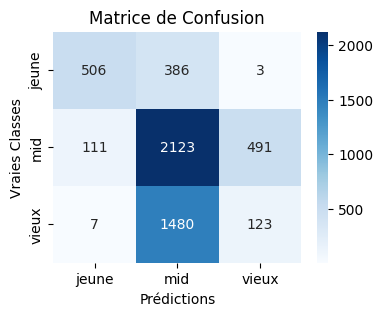

In [47]:
import pandas as pd
show_confusion_matrix(y_test, y_pred_orane, dico_label.keys())

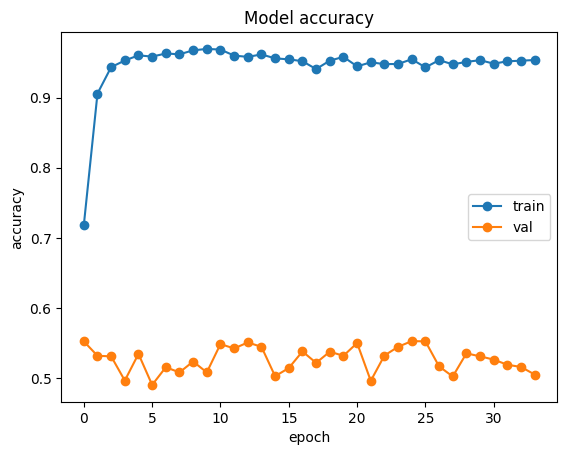

In [ ]:
plt.plot(summary_orane.history['accuracy'], marker='o')
plt.plot(summary_orane.history['val_accuracy'],marker='o')
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

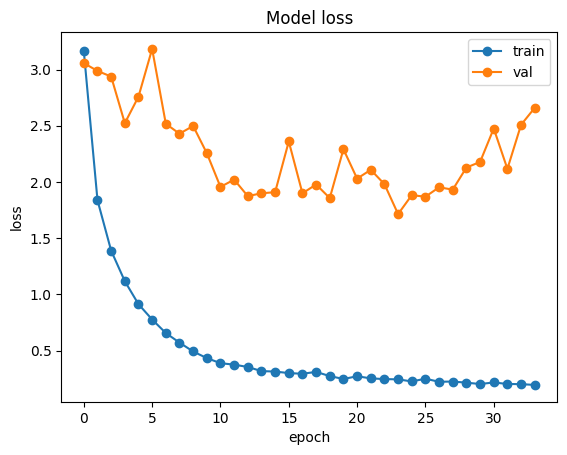

In [49]:
plt.plot(summary_orane.history['loss'], marker='o')
plt.plot(summary_orane.history['val_loss'],marker='o')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

In [54]:
def cnn_quand_meme(x_train, y_train, x_test, y_test, x_val, y_val, batch_size=128, epochs=50, verbose =1):
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
    mc = ModelCheckpoint('best_model.keras', monitor='val_loss', verbose=1, save_best_only=True)

    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(Conv1D(64, 3, activation='relu'))
    model.add(MaxPooling1D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation='softmax'))


    # Optimizers on choisit Adam
    opt = Adam(learning_rate=0.001)

    model.compile(loss=categorical_crossentropy,
                  optimizer=opt, # ADA AUTRE CHOSE ADAM et sgd
                  metrics=['accuracy'])

    summary = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=verbose,
              validation_data=(x_val, y_val), callbacks = [es, mc])

    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    return summary, model, score


In [55]:
summary_cnn, model_cnn, score_cnn = cnn_quand_meme(x_train, y_train, x_test, y_test, x_val, y_val, batch_size=batch_size, epochs=epochs, verbose =1)

/home/lise/Documents/TAL_M2S3/CNN/venv_CNN/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Kernel shape must have the same length as input, but received kernel of shape (3, 512, 32) and input of shape (None, 17634, 1, 1, 512).

In [ ]:
y_cnn = model_cnn.predict(x_test)